In [1]:
# import pathlib
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import re
#import random
#from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_auc_score

import xgboost as xgb
from sklearn.metrics import auc, accuracy_score, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV
#from string import ascii_letters
import seaborn as sns
import h5py as h5

#from string import ascii_letters

In [15]:
wandb.login(key='e5a11de985c639dbc312a08b7dd78d960a7fb805')

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for localhost to your netrc file: /Users/ndueser/.netrc
wandb: Network error (ConnectionError), entering retry loop.


True

In [21]:
wandb.login --relogin

NameError: name 'relogin' is not defined

In [19]:
import random

# start a new wandb run to track this script
wandb.init(settings=wandb.Settings(start_method="fork"),
    # set the wandb project where this run will be logged
    project="my-awesome-project",
    
    # track hyperparameters and run metadata
    config={
    "learning_rate": 0.02,
    "architecture": "CNN",
    "dataset": "CIFAR-100",
    "epochs": 10,
    }
)

# simulate training
epochs = 10
offset = random.random() / 5
for epoch in range(2, epochs):
    acc = 1 - 2 ** -epoch - random.random() / epoch - offset
    loss = 2 ** -epoch + random.random() / epoch + offset
    
    # log metrics to wandb
    wandb.log({"acc": acc, "loss": loss})
    
# [optional] finish the wandb run, necessary in notebooks
wandb.finish()

wandb: Network error (ConnectionError), entering retry loop.


Problem at: /var/folders/jg/_qgpsg4n22d16c3lpjt2qdk80000gn/T/ipykernel_17584/2109576246.py 4 <module>


CommError: Run initialization has timed out after 60.0 sec. 
Please refer to the documentation for additional information: https://docs.wandb.ai/guides/track/tracking-faq#initstarterror-error-communicating-with-wandb-process-

In [12]:
run = wandb.init(
    # Set the project where this run will be logged
    project="my-awesome-project",
    # Track hyperparameters and run metadata
    config={
        "learning_rate": 0.01,
        "epochs": 10,
    })

wandb: Network error (ConnectionError), entering retry loop.


Problem at: /var/folders/jg/_qgpsg4n22d16c3lpjt2qdk80000gn/T/ipykernel_17584/2562941427.py 1 <module>


CommError: Run initialization has timed out after 60.0 sec. 
Please refer to the documentation for additional information: https://docs.wandb.ai/guides/track/tracking-faq#initstarterror-error-communicating-with-wandb-process-

In [8]:
import wandb

wandb.login

<function wandb.sdk.wandb_login.login(anonymous: Optional[Literal['must', 'allow', 'never']] = None, key: Optional[str] = None, relogin: Optional[bool] = None, host: Optional[str] = None, force: Optional[bool] = None, timeout: Optional[int] = None) -> bool>

In [2]:
from wandb.xgboost import WandbCallback
import xgboost as XGBClassifier

In [3]:
df =pd.read_pickle('../pickle_pd/pd_top_25.pkl')
features = ['lep_pt_2','met_et','lep_pt_1','jet_n','lep_E_1','jet_pt_0','lep_eta_0','jet_pt_1','lep_pt_0','lep_E_2','lep_eta_1','lep_phi_1','lep_phi_0',
            'lep_ptcone30_1','lep_ptcone30_0','jet_eta_0','jet_m','lep_E_0','jet_eta_1','jet_pt_2','lep_pt_3','jet_E_0','lep_charge_1','lep_charge_0','lep_E_3']

In [4]:
 X_train, X_test, y_train, y_test = train_test_split( df[features], df['label'], test_size=0.1, random_state=42)

In [13]:
# Start a wandb run
run = wandb.init()

# Pass WandbCallback to the model
bst = XGBClassifier()
bst.fit(X_train, y_train, 
    callbacks=[WandbCallback(log_model=True)])

# Close your wandb run
run.finish()

wandb: Network error (ConnectionError), entering retry loop.


Problem at: /var/folders/jg/_qgpsg4n22d16c3lpjt2qdk80000gn/T/ipykernel_17584/2375556892.py 2 <module>


CommError: Run initialization has timed out after 60.0 sec. 
Please refer to the documentation for additional information: https://docs.wandb.ai/guides/track/tracking-faq#initstarterror-error-communicating-with-wandb-process-

In [8]:
xgb_model = xgb.XGBClassifier()         
xgb_model.fit(X_train[features],y_train)
y_pred = xgb_model.predict(X_test)

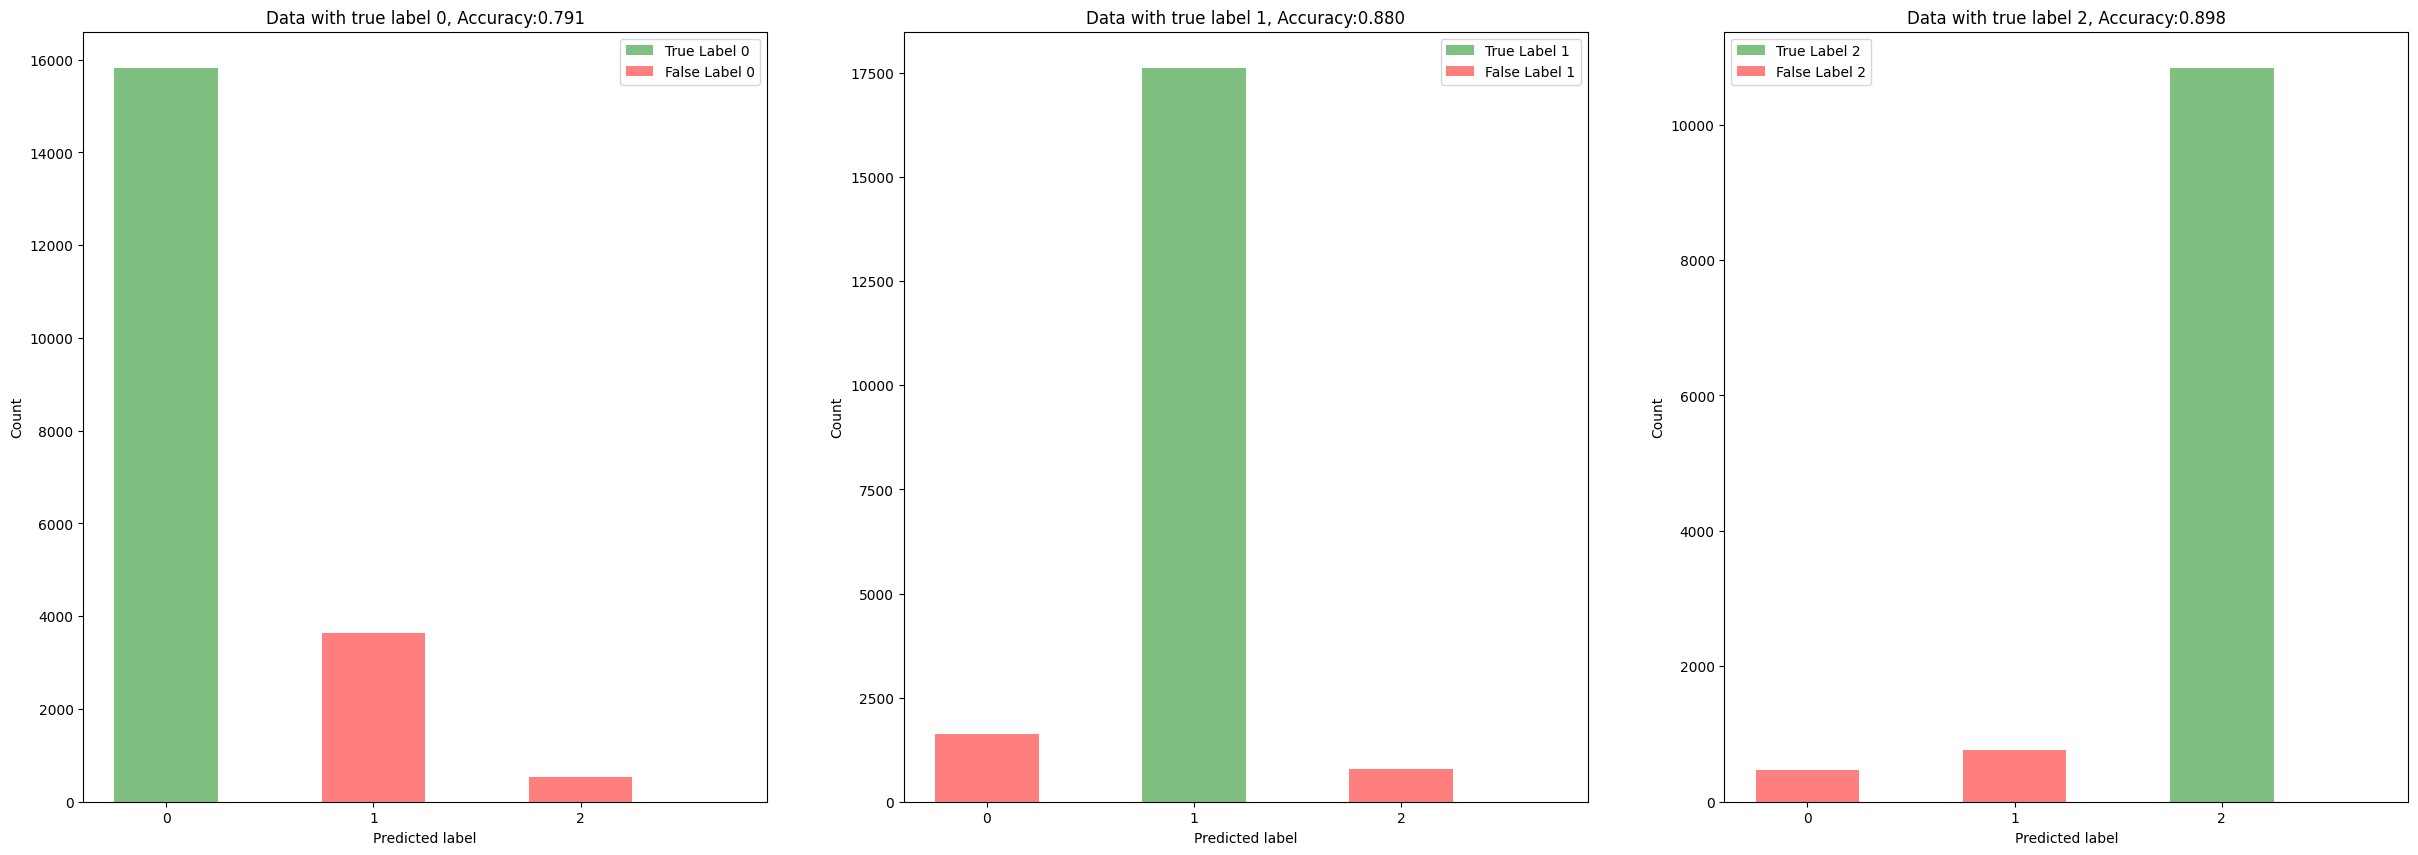

In [9]:
bins = [-0.25, 0.75, 1.75, 2.75] 
fig, ax = plt.subplots(1,3, figsize = (30,10))
for i, label in enumerate(range(3)):
    test_label = y_test[y_test==label]
    pred_label = y_pred[y_test==label]
    true_label = pred_label[pred_label == test_label]
    false_label= pred_label[pred_label != test_label]
    #print(len(false_label))
    ax[i].hist(true_label , bins = bins, histtype = 'barstacked', alpha=0.5, label='True Label ' + str(label), align = 'mid', width = 0.5, color = 'green')
    ax[i].hist(false_label, bins = bins, histtype = 'barstacked', alpha=0.5, label='False Label ' + str(label), align = 'mid', width = 0.5, color = 'red')
    #ax[i] = plt.xlabel('label')
    ax[i].set_title(f'Data with true label {i}, Accuracy:{accuracy_score(test_label, pred_label):.3f}')
    ax[i].set_xlabel(xlabel = f'Predicted label')
    ax[i].set_ylabel('Count')
    ax[i].legend()
    ax[i].set_xticks(range(3))

#plt.legend()
#plt.xlim(-0.5, 2.5)
#plt.xticks(range(3)) 